In [1]:
import requests as rq
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
key = 'AbZyMMf_O6dMbpk4jG3beu3G_eJuCU6vcPSVCCMKBod4ydhmz74'
req = rq.get('https://api.pandascore.co/lol/champions?page[number]=1&page[size]=100&token=AbZyMMf_O6dMbpk4jG3beu3G_eJuCU6vcPSVCCMKBod4ydhmz74')
# print(req.text)

In [3]:
req_2 = rq.get('https://api.pandascore.co/lol/champions?page[number]=2&page[size]=100&token=AbZyMMf_O6dMbpk4jG3beu3G_eJuCU6vcPSVCCMKBod4ydhmz74')
# print(req_2.text)

In [4]:
champs = {'champions': req.text + req_2.text}
# print(champs)

In [5]:
data = json.dumps(champs)
data_df = pd.read_json(req.text)

In [6]:
data_2_df = pd.read_json(req_2.text)
# data_2_df

In [7]:
data_df = data_df.append(data_2_df, ignore_index=True)
data_df

,armor,armorperlevel,attackdamage,attackdamageperlevel,attackrange,attackspeedoffset,attackspeedperlevel,big_image_url,crit,critperlevel,...,image_url,movespeed,mp,mpperlevel,mpregen,mpregenperlevel,name,spellblock,spellblockperlevel,videogame_versions
0,33.000,4.00,60.000,4.000,125,NaN,1.750,https://cdn.pandascore.co/images/lol/champion/...,0,0,...,https://cdn.pandascore.co/images/lol/champion/...,340,0.00,0.0,0.000,0.000,Sett,32.0,1.25,[10.5.1]
1,21.000,4.00,48.000,2.500,550,NaN,3.500,https://cdn.pandascore.co/images/lol/champion/...,0,0,...,https://cdn.pandascore.co/images/lol/champion/...,340,450.00,30.0,7.000,0.700,Neeko,30.0,0.50,[10.5.1]
2,33.000,3.40,68.000,3.000,425,NaN,2.600,https://cdn.pandascore.co/images/lol/champion/...,0,0,...,https://cdn.pandascore.co/images/lol/champion/...,340,325.00,40.0,8.000,0.700,Graves,32.0,1.25,[10.5.1]
3,37.000,3.50,61.540,3.500,125,NaN,1.130,https://cdn.pandascore.co/images/lol/champion/...,0,0,...,https://cdn.pandascore.co/images/lol/champion/...,325,267.20,40.0,8.500,0.800,Blitzcrank,32.1,1.25,[10.5.1]
4,44.000,3.50,62.000,3.750,125,NaN,2.125,https://cdn.pandascore.co/images/lol/champion/...,0,0,...,https://cdn.pandascore.co/images/lol/champion/...,330,350.00,40.0,8.500,0.800,Alistar,32.1,1.25,[10.5.1]
5,32.000,3.80,50.000,3.000,550,NaN,2.140,https://cdn.pandascore.co/images/lol/champion/...,0,0,...,https://cdn.pandascore.co/images/lol/champion/...,325,375.00,40.0,11.500,0.400,Soraka,30.0,0.50,"[10.5.1, 10.4.1]"
6,34.000,3.50,63.000,3.375,125,NaN,1.900,https://cdn.pandascore.co/images/lol/champion/...,0,0,...,https://cdn.pandascore.co/images/lol/champion/...,345,330.00,45.0,7.500,0.550,Singed,32.1,1.25,"[10.5.1, 10.4.1]"
7,27.000,3.50,54.000,4.250,125,NaN,3.000,https://cdn.pandascore.co/images/lol/champion/...,0,0,...,https://cdn.pandascore.co/images/lol/champion/...,335,375.00,45.0,6.000,0.800,Jayce,30.0,0.50,"[10.5.1, 10.4.1]"
8,32.000,2.50,59.000,3.000,175,NaN,6.000,https://cdn.pandascore.co/images/lol/champion/...,0,0,...,https://cdn.pandascore.co/images/lol/champion/...,335,100.00,0.0,0.000,0.000,Gnar,30.0,0.50,"[10.5.1, 10.4.1]"
9,31.000,3.50,61.000,3.200,125,NaN,1.850,https://cdn.pandascore.co/images/lol/champion/...,0,0,...,https://cdn.pandascore.co/images/lol/champion/...,345,100.00,0.0,0.000,0.000,Rumble,32.1,1.25,"[10.5.1, 10.4.1, 10.3.1]"


In [8]:
data_df.columns

Index(['armor', 'armorperlevel', 'attackdamage', 'attackdamageperlevel',
       'attackrange', 'attackspeedoffset', 'attackspeedperlevel',
       'big_image_url', 'crit', 'critperlevel', 'hp', 'hpperlevel', 'hpregen',
       'hpregenperlevel', 'id', 'image_url', 'movespeed', 'mp', 'mpperlevel',
       'mpregen', 'mpregenperlevel', 'name', 'spellblock',
       'spellblockperlevel', 'videogame_versions'],
      dtype='object')

In [9]:
data_df_600 = data_df[(data_df["attackrange"] > 550) & (data_df["attackrange"] < 700)]

In [10]:
# data_df

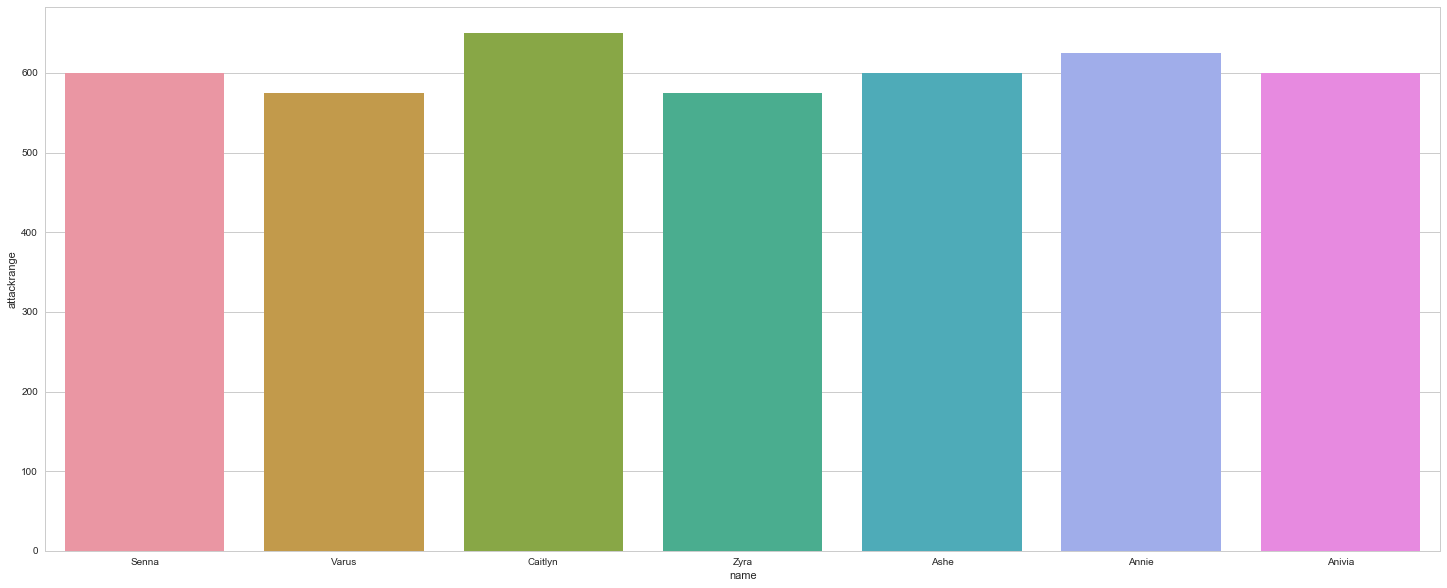

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(25, 10))
sns.barplot(x="name", y="attackrange",data=data_df_600)
plt.show()

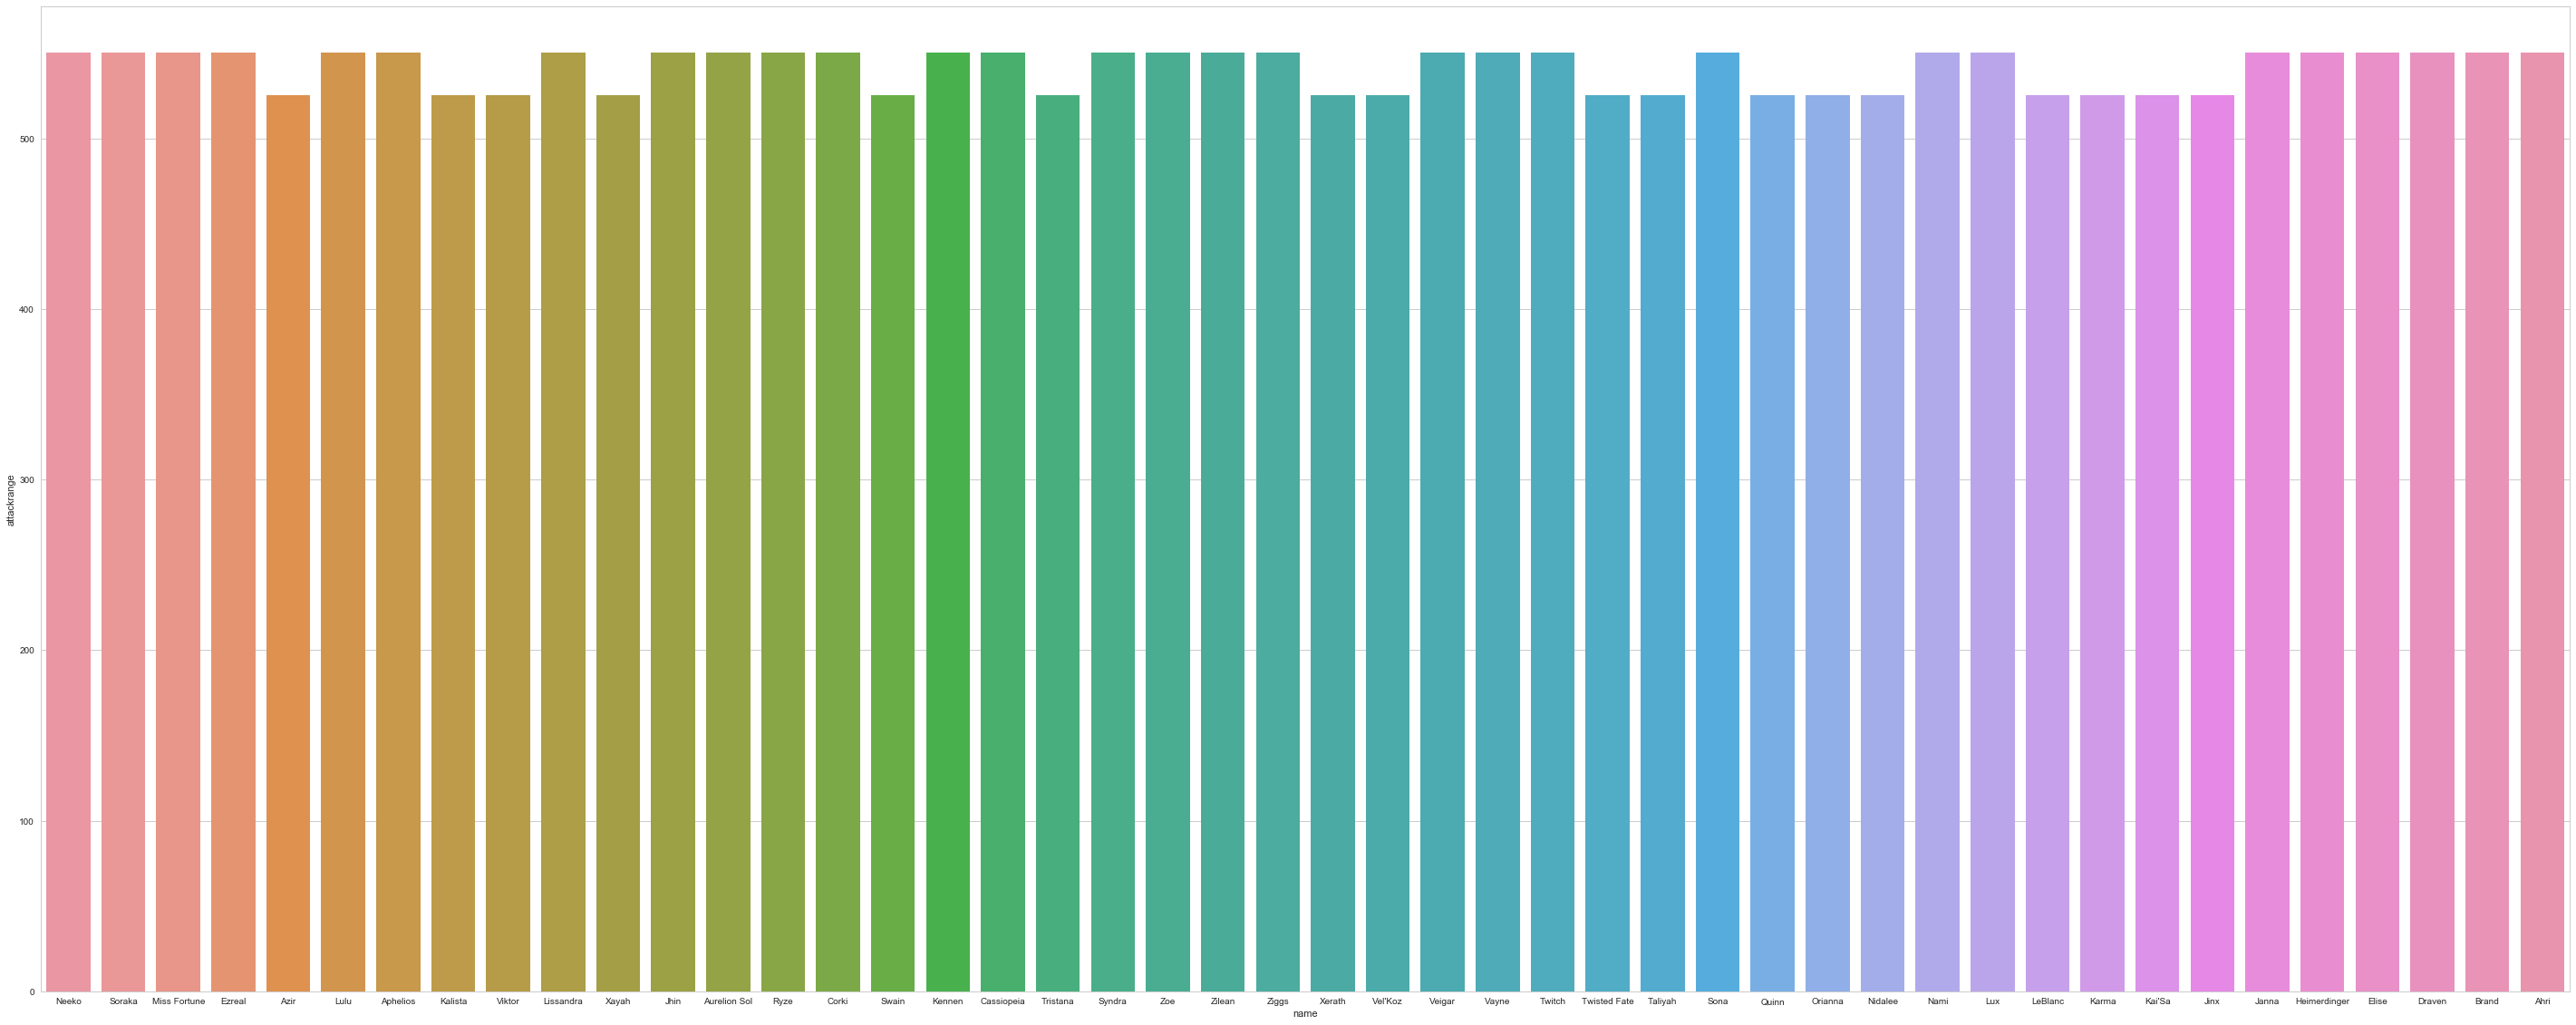

In [40]:
data_df_500 = data_df[(data_df["attackrange"] > 500) & (data_df["attackrange"] < 575)]
sns.set(style="whitegrid")
plt.figure(figsize=(50, 20))
sns.barplot(x="name", y="attackrange",data=data_df_500)
plt.show()

In [31]:
def arr_name(col_name):  
    arr_name = []
    for i in data_df:
        if(i == col_name):
            arr_name = data_df[i]
    return arr_name
name = arr_name('name')
armor = arr_name('armor')

In [43]:
def create_dic(name, col):
    diction = {}
    for i in range(len(name)):
        diction[name[i]] = col[i]
    return diction
D = create_dic(name, armor)

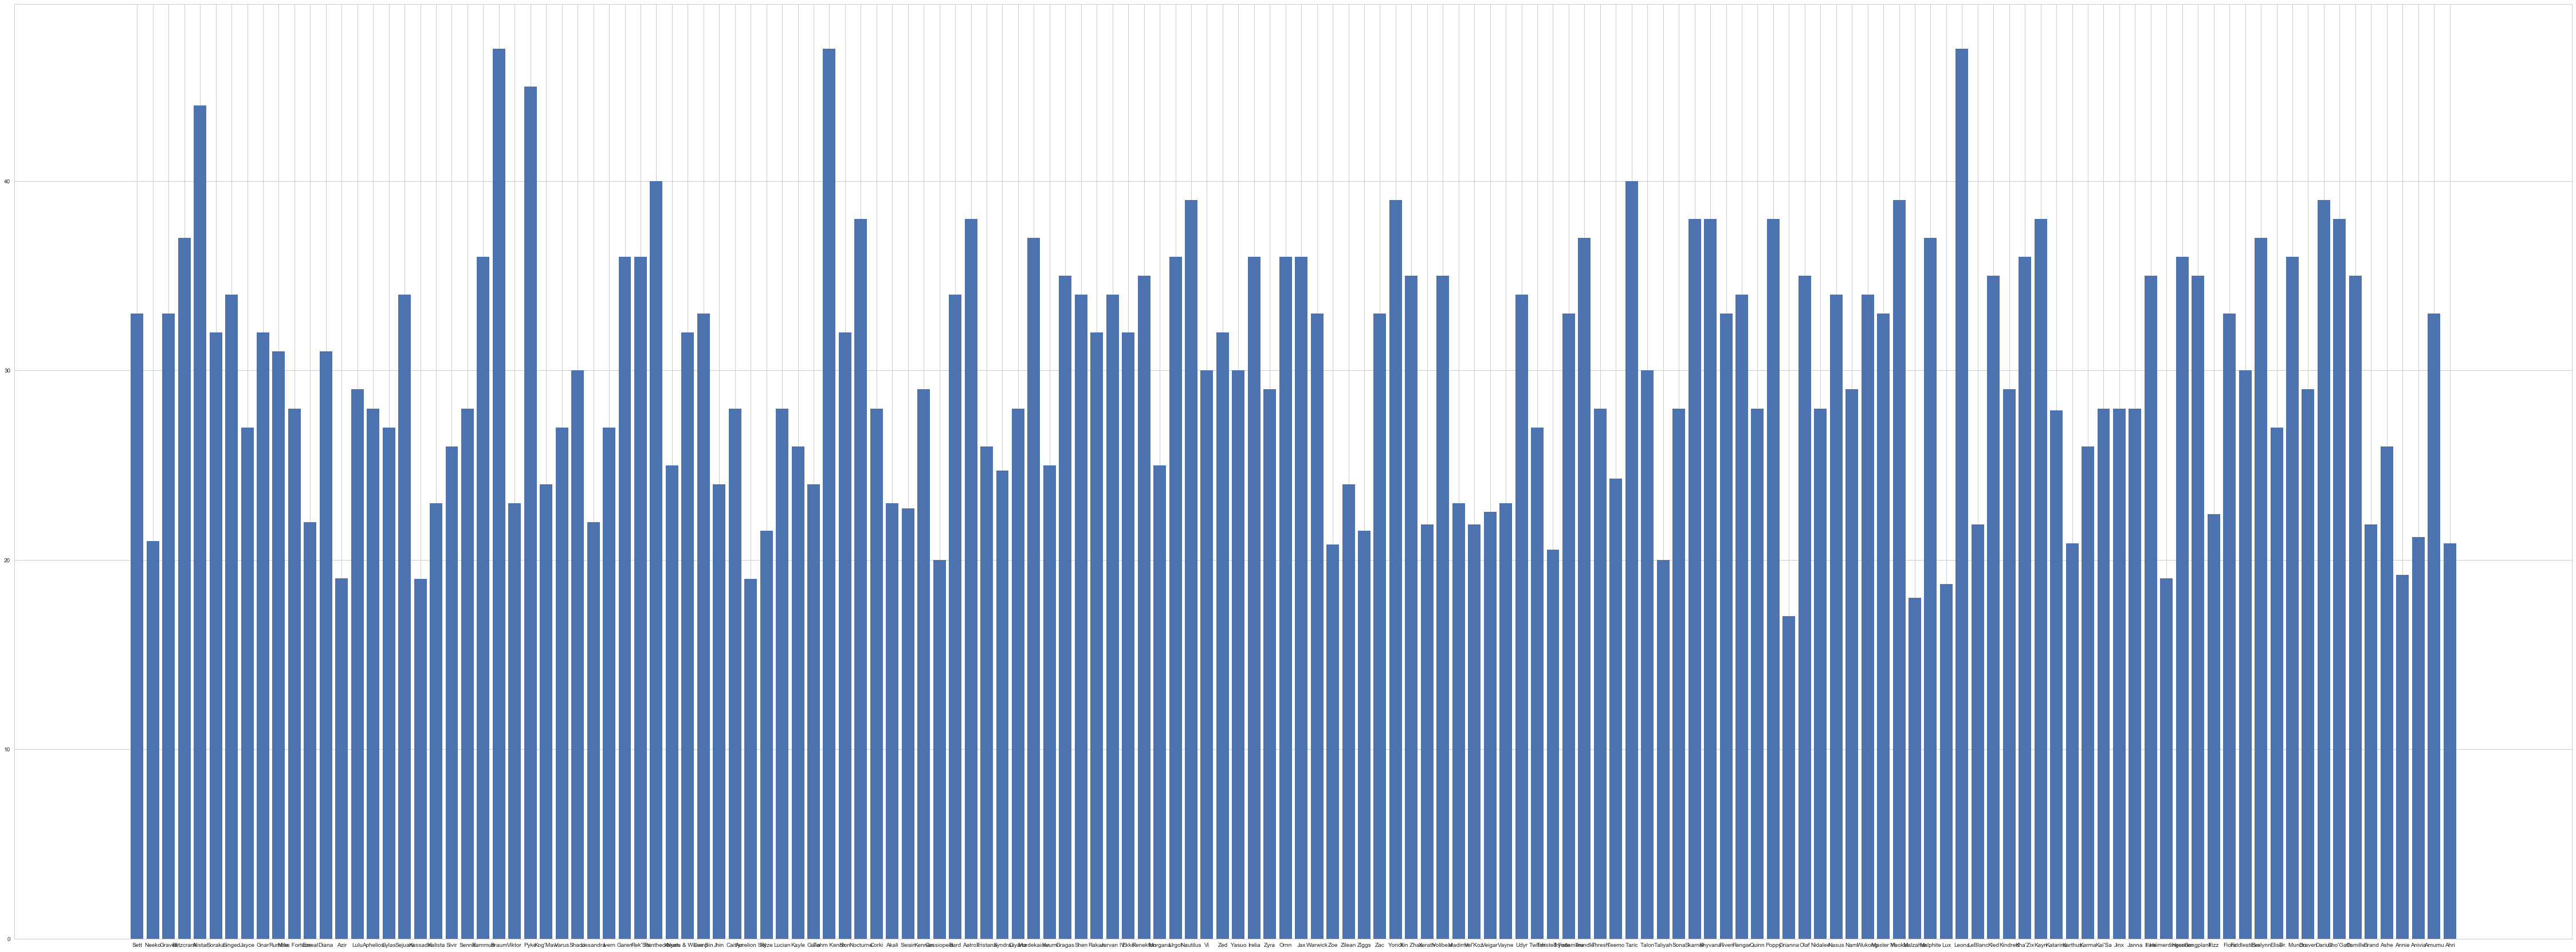

In [47]:
# sns.set(style="whitegrid")
plt.figure(figsize=(80, 30))
# sns.barplot(x="name", y="armor",data=armor_dic)
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()